<a href="https://colab.research.google.com/github/shruti2835/shruti2835/blob/main/Amazon_Dataset_using_VADER_AND_TRANSFORMERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nltk
nltk.download('stopwords')
st_words= set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df=pd.read_csv('/content/Reviews.csv')

In [ ]:
df1=df.head(5000)

In [ ]:
df1.shape

(5000, 10)

In [ ]:
#the sample dataset consists of 15 columns and 49 rows
df.shape

(568454, 10)

In [ ]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#Checking for null values. 
df1.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
#checking the reviews
df['Text'].values[10]

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [ ]:
df1.drop(['Id','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Summary'], axis=1, inplace=True)

In [ ]:
df1.head()

,ProductId,UserId,Score,Time,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,5,1303862400,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4,1219017600,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2,1307923200,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,1350777600,Great taffy at a great price. There was a wid...


In [ ]:
df1['Time'] = pd.to_datetime(df1['Time'],unit='s')


In [ ]:
df1.head()

,ProductId,UserId,Score,Time,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1,2012-09-07,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4,2008-08-18,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,2012-10-21,Great taffy at a great price. There was a wid...


In [ ]:
def prep_text(text):
    text=text.lower() #casing
    text=re.sub(r"https\S+|www\S+|https\S+"," ", text, flags=re.MULTILINE) #remove any urls
    text=text.translate(str.maketrans(" "," ",string.punctuation)) #remove any punctuations
    text=re.sub(r'\@\w+|\#\&'," ", text) #remove @ # &
    
    return text

In [ ]:
df1["Text"]=df1["Text"].apply(prep_text)


In [ ]:
#text after preprocessing
df1['Text'].values[10]

'i dont know if its the cactus or the tequila or just the unique combination of ingredients but the flavour of this hot sauce makes it one of a kind  we picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away  when we realized that we simply couldnt find it anywhere in our city we were bummedbr br now because of the magic of the internet we have a case of the sauce and are ecstatic because of itbr br if you love hot saucei mean really love hot sauce but dont want a sauce that tastelessly burns your throat grab a bottle of tequila picante gourmet de inclan  just realize that once you taste it you will never want to use any other saucebr br thank you for the personal incredible service'

**Using Textblob to analyse sentiments.**

---




**Textblob** is a python library used to perform text processing tasks such as sentiment analysis. To perform sentiment analysis, we can use the '**sentiment**' method of the 'Textblob' class. The method will return two values '**Subjectivity**' and '**Polarity**'. **Polarity** score represents the sentiment of the text and it ranges between -1 to 1, where -1 is negative, 0 is neutral and 1 is positive. **Subjectivity** specifies if the text is factual or opinionated. Subjectivity score ranges between 0 and 1, where 0 is very objective and 1 is very subjective. 

In [ ]:
#using textblob approach to find the subjectivity and specificity
from textblob import TextBlob

In [ ]:
#subjectivity specifies if the text is factual or opinionated.
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
#polarity specifies the overall sentiment of the text
def polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
#creating a copy of the original dataframe
df_copy = df1.copy()

In [ ]:
df_copy['Subjectivity']=df_copy['Text'].apply(subjectivity)

In [ ]:
df_copy['Polarity']=df_copy['Text'].apply(polarity)

In [ ]:
df_copy.shape

(50000, 8)

In [ ]:
df_copy.iloc[2:3, :]

,Id,ProductId,UserId,Score,Time,Text,Subjectivity,Polarity
2,3,B000LQOCH0,ABXLMWJIXXAIN,4,2008-08-18,this is a confection that has been around a fe...,0.448571,0.133571


In [ ]:
df_copy['Text'].values[2]

'this is a confection that has been around a few centuries  it is a light pillowy citrus gelatin with nuts  in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar  and it is a tiny mouthful of heaven  not too chewy and very flavorful  i highly recommend this yummy treat  if you are familiar with the story of cs lewis the lion the witch and the wardrobe  this is the treat that seduces edmund into selling out his brother and sisters to the witch'

In [ ]:
#the sentiment indicated by the model is neutral, however the review is positive

**Using Vader Sentiment Analyzer.**

---



**Vader** **Sentiment** **Analyser** is another python library that can be used for sentiment analysis. Vader Sentiment Analyser returns 4 values: **positive**, **negative**, **neutral** and **compound**. The compound score summarizes the overall sentiment of the text. It ranges from -1(most negative) to 1 (most positive)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
senti_an=SentimentIntensityAnalyzer()

In [ ]:
result_df={}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
  text=row['Text']
  r_id=row['Id']
  result_df[r_id]=senti_an.polarity_scores(text)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
#result_df
vader_ana=pd.DataFrame(result_df).T
vader_ana=vader_ana.reset_index().rename(columns={'index':'Id'})
vader_ana=vader_ana.merge(df1, how='left')

In [ ]:
vader_ana.head()

,Id,neg,neu,pos,compound,ProductId,UserId,Score,Time,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,i have bought several of the vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,1,2012-09-07,product arrived labeled as jumbo salted peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,4,2008-08-18,this is a confection that has been around a fe...
3,4,0.000,0.925,0.075,0.4404,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,if you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,5,2012-10-21,great taffy at a great price there was a wide...


In [ ]:
vader_ana['Text'].values[43000]

'good thingsbr 1 the thickness is a plus it is nice to bite a thicker piece of chocolatebr 2 it is all organicbr br not so good thingsbr 1 the initial aroma is a bit off putting somewhat like a cross between coffee and ashtraybr 2 takes a while to actually taste this product its overall weak on cocoa flavor but at least it doesnt taste like it smellsbr 3 has a waxiness to it even though there is no paraffin in it not sure whybr 4 my initial reaction to this supposedly dark chocolate was that it was way too sweet and not at all complex in flavorbr 5 anticlimactic chocolate lacking any particularly distinguishing notesbr br i am a big fan of lindt chocolate especially the very dark high cocoa percentage bars with their rich wonderful full spectrum of complex flavors and fruity notes this product was just plain bland and nothing special three stars instead of two because i didnt hate it but i wouldnt buy it'

In [ ]:
vader_ana.iloc[43000:43001, :]

,Id,neg,neu,pos,compound,ProductId,UserId,Score,Time,Text
43000,43001,0.056,0.771,0.173,0.9684,B002NHYQAS,A2MSQNPTNAAGL1,3,2011-02-28,good thingsbr 1 the thickness is a plus it is ...


In [ ]:
"""vader model or a simple sentiment module used above does not take into account the context
Hence even though the above sentence sounds neutral to the humans. The compound score indicates a
positive sentiment""" 

'vader model or a simple sentiment module used above does not take into account the context\nHence even though the above sentence sounds negative to the humans is the compound score indicates a\nneutral sentiment'

**Using Pretrained Bert Model**

---



Tranformers is a useful model that can be used to process textual data. Using Pretrained models such as Bert can be useful in analyzing large raw text data as they have already learned the nuances of natural language. 

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
model=AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
import torch
def sentiment_score(review):
  tokens=tokenizer.encode(review, return_tensors='pt',max_length=512, truncation=True)
  result=model(tokens)
  return int (torch.argmax(result.logits))+1

In [ ]:
df1['bert_score']=df1['Text'].apply(sentiment_score) 

In [ ]:
df1['Text'].values[3]

'if you are looking for the secret ingredient in robitussin i believe i have found it  i got this in addition to the root beer extract i ordered which was good and made some cherry soda  the flavor is very medicinal'

In [ ]:
df1.iloc[3:4, :]

,ProductId,UserId,Score,Time,Text,bert_score
3,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,if you are looking for the secret ingredient i...,4


In [ ]:
#the bert_score shows that model was successfully able to identify that the review is negative.

**Sentiment Scoring**

In [ ]:
conditions=[df1['bert_score']==1, df1['bert_score']==2, df1['bert_score']==3,df1['bert_score']==4,df1['bert_score']==5]

choices=['Extremely Negative','Negative','Neutral','Positive','Extremely Positive']

df1['Sentiment']=np.select(conditions,choices)

In [ ]:
df1.iloc[1:2, :]

,Id,ProductId,UserId,Score,Time,Text,bert_score,Sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,1,2012-09-07,product arrived labeled as jumbo salted peanut...,1,Extremely Negative


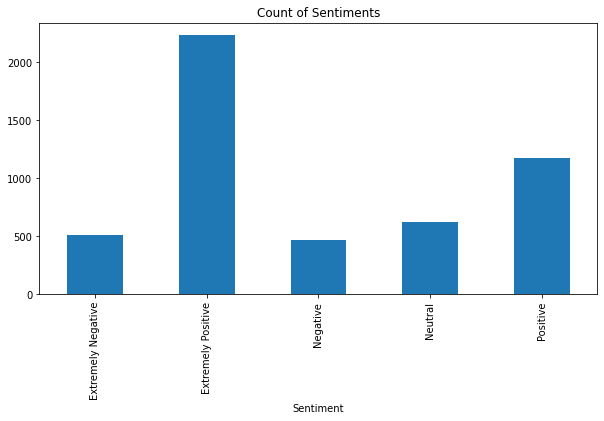

In [ ]:
ax = df1['Sentiment'].value_counts().sort_index().plot(kind='bar', title='Count of Sentiments',figsize=(10, 5))
ax.set_xlabel('Sentiment')
plt.show()

**Finding customer purchase history**

In [ ]:
#finding customer purchase history
df1.UserId.value_counts()

A31N6KB160O508    5
A3NHUQ33CFH3VM    5
A3OXHLG6DIBRW8    5
A3PJZ8TU8FDQ1K    5
AY12DBB0U420B     5
                 ..
A236PN3VQSOKN8    1
A2K5BNVW2P3F5L    1
A1UGBOWML06P3S    1
A2AG8GNKUKILBD    1
A122CSYJ3YSKI0    1
Name: UserId, Length: 4804, dtype: int64

In [ ]:
#mapping purchase history of all the customers
user_purchase_count =df1.groupby('UserId')['ProductId'].nunique()
df1['no_of_purchases_by_user']=df1['UserId'].map(user_purchase_count)

In [ ]:
#counting the occurence of all products
df1['ProductId'].value_counts()

B005K4Q1VI    324
B001RVFDOO    305
B004391DK0    232
B000G6RYNE    217
B00139TT72    159
             ... 
B00032EZRY      1
B001IB69B4      1
B009UOFU20      1
B0041T6KT6      1
B0001OINNQ      1
Name: ProductId, Length: 731, dtype: int64

**Average rating for each product**

In [ ]:
product_rating=df1.groupby('ProductId')['Score'].mean()

In [ ]:
df1['Average_Product_Rating']=df1['ProductId'].map(product_rating)

In [ ]:
# product_occurence_df1[product_occurence_df1['product_occurence']==3]

In [ ]:
# count_series = df1.groupby(['ProductId']).size()
# product_occurence_df1 = count_series.to_frame(name = 'product_occurence').reset_index()

In [ ]:
df1.head()

,ProductId,UserId,Score,Time,Text,bert_score,no_of_purchases_by_user,Average_Product_Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,i have bought several of the vitality canned d...,5,1,5.00
1,B00813GRG4,A1D87F6ZCVE5NK,1,2012-09-07,product arrived labeled as jumbo salted peanut...,1,1,1.00
2,B000LQOCH0,ABXLMWJIXXAIN,4,2008-08-18,this is a confection that has been around a fe...,5,1,4.00
3,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,if you are looking for the secret ingredient i...,4,1,2.00
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,2012-10-21,great taffy at a great price there was a wide...,5,1,4.75


In [ ]:
df2=df1.copy()

In [ ]:
df2.head()

,ProductId,UserId,Score,Time,Text,bert_score,no_of_purchases_by_user,Average_Product_Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,i have bought several of the vitality canned d...,5,1,5.00
1,B00813GRG4,A1D87F6ZCVE5NK,1,2012-09-07,product arrived labeled as jumbo salted peanut...,1,1,1.00
2,B000LQOCH0,ABXLMWJIXXAIN,4,2008-08-18,this is a confection that has been around a fe...,5,1,4.00
3,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,if you are looking for the secret ingredient i...,4,1,2.00
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,2012-10-21,great taffy at a great price there was a wide...,5,1,4.75


In [ ]:
#product_id = 'your_product_id_here'
#product_history = df[df['product id'] == product_id]
#The productid and user id are in the alphanumeric forms. We need to label encode it

In [ ]:
#label encoding product id
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
df2['ProductId'] = label_encoding.fit_transform(df2['ProductId'])


In [ ]:
#label encoding user id
df2['UserId']=label_encoding.fit_transform(df2['UserId'])

In [ ]:
df2.head()

,ProductId,UserId,Score,Time,Text,bert_score,no_of_purchases_by_user,Average_Product_Rating
0,261,3537,5,2011-04-27,i have bought several of the vitality canned d...,5,1,5.00
1,710,461,1,2012-09-07,product arrived labeled as jumbo salted peanut...,1,1,1.00
2,152,3946,4,2008-08-18,this is a confection that has been around a fe...,5,1,4.00
3,187,2869,2,2011-06-13,if you are looking for the secret ingredient i...,4,1,2.00
4,678,1088,5,2012-10-21,great taffy at a great price there was a wide...,5,1,4.75


In [ ]:
#dropping sentiment column and renaming bert_sore as sentiment
df2.drop(['Time'], axis=1, inplace=True)

In [ ]:
df2=df2.rename(columns={'bert_score':'Sentiment','Score':'Rating'})

In [ ]:
df2.head()

,ProductId,UserId,Rating,Text,Sentiment,no_of_purchases_by_user,Average_Product_Rating
0,261,3537,5,i have bought several of the vitality canned d...,5,1,5.00
1,710,461,1,product arrived labeled as jumbo salted peanut...,1,1,1.00
2,152,3946,4,this is a confection that has been around a fe...,5,1,4.00
3,187,2869,2,if you are looking for the secret ingredient i...,4,1,2.00
4,678,1088,5,great taffy at a great price there was a wide...,5,1,4.75


In [ ]:
df2.head()

,ProductId,UserId,Rating,Text,Sentiment,no_of_purchases_by_user,Average_Product_Rating
0,261,3537,5,i have bought several of the vitality canned d...,5,1,5.00
1,710,461,1,product arrived labeled as jumbo salted peanut...,1,1,1.00
2,152,3946,4,this is a confection that has been around a fe...,5,1,4.00
3,187,2869,2,if you are looking for the secret ingredient i...,4,1,2.00
4,678,1088,5,great taffy at a great price there was a wide...,5,1,4.75


In [ ]:
#plotting a wordcloud
from os import path
from PIL import Image
mask = np.array(Image.open("/content/amazon.png"))
mask.shape

FileNotFoundError: ignored

In [ ]:
text = " ".join(Text for Text in df1.Text)
stopwords = set(STOPWORDS)


In [ ]:
wordcloud_review = WordCloud(stopwords=stopwords, background_color="white", max_font_size=100, mode="RGBA", max_words=500,collocations=False, contour_color='black', mask=mask).generate(text)


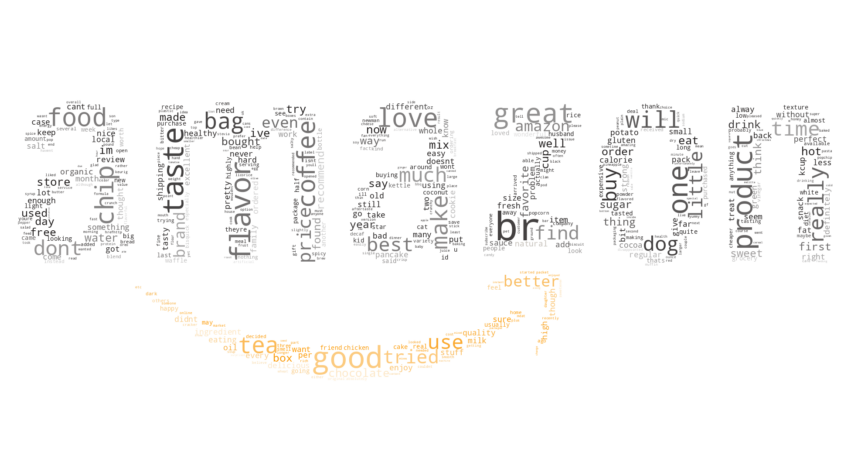

In [ ]:
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud_review.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

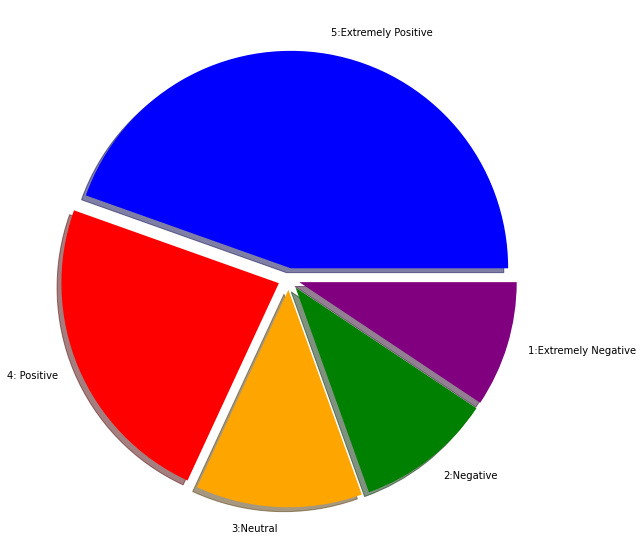

In [ ]:
y = df2['bert_score'].value_counts()
lab = ["5:Extremely Positive", "4: Positive", "3:Neutral",'2:Negative','1:Extremely Negative']
exp = [0.05, 0.05, 0.05,0.05,0.05]
col= ['blue','red','orange', 'green','purple']
plt.figure(figsize=(10,10))
plt.pie(y, labels = lab, explode = exp, colors = col, shadow = True)
plt.show() 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
review_text=vectorizer.fit_transform(df2['Text'])

In [ ]:
remaining_features = np.array([
    df2['ProductId'],
    df2['UserId'],
    df2['no_of_purchases_by_user'],
    df2['Average_Product_Rating']
]).T

In [ ]:
#Concatenating the tfidf vectors of text and the other features before spliting them
X = np.concatenate((review_text.toarray(), remaining_features), axis=1)

In [ ]:
#Defining the target variable
y = df2['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [ ]:
prediction_LR=model1.predict(X_test)


In [ ]:
print(accuracy_score(y_test,prediction_LR))


0.447


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=0)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
preddtc=DTC.predict(X_test)


In [ ]:
print(accuracy_score(y_test,preddtc))


0.44


In [ ]:
print(classification_report(y_test,preddtc))


NameError: ignored